In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Carga de datos

In [0]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#For some reason, the loaded data does not include the target variable (MEDV), we add it here
data['MEDV'] = pd.Series(data=boston.target, index=data.index) 
data.describe() #get some basic stats on the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Veamos si hay datos nulos

In [0]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [0]:
train_dataset = data.sample(frac=0.75,random_state=0)
test_dataset = data.drop(train_dataset.index)

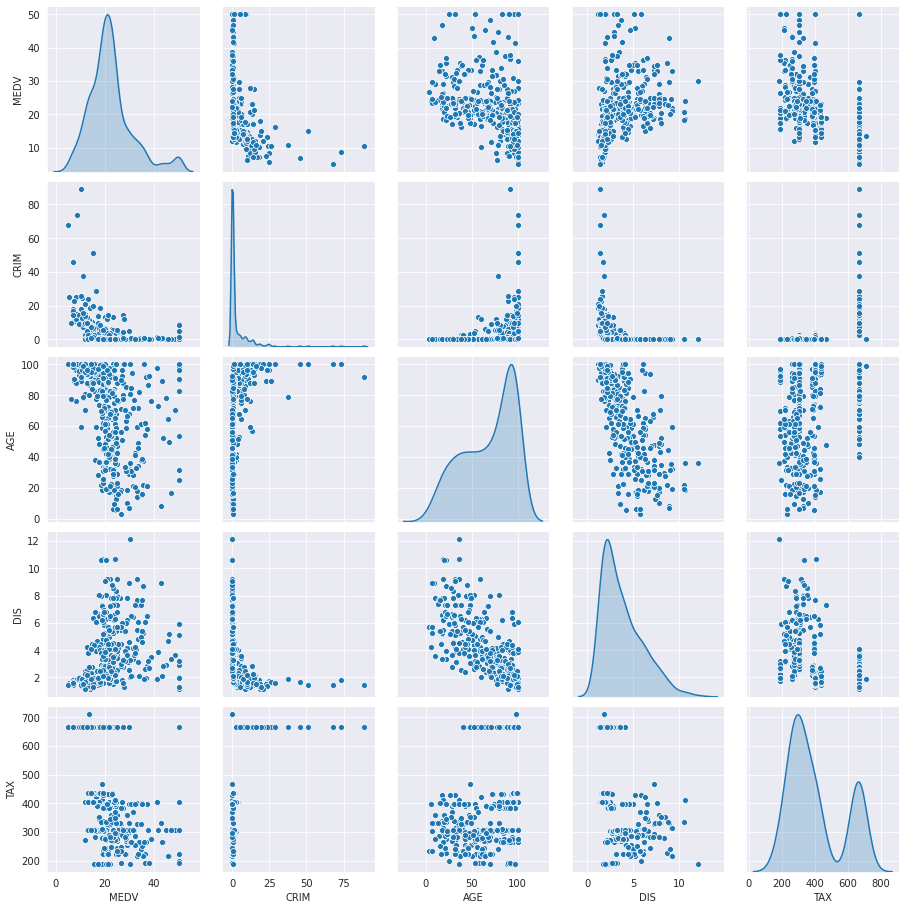

In [0]:
sns.set_style("darkgrid")
sns.pairplot(train_dataset[["MEDV", "CRIM","AGE","DIS","TAX"]], diag_kind="kde")

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,380.0,3.750403,9.207575,0.00632,0.083827,0.28456,3.359358,88.9762
ZN,380.0,11.028947,22.793711,0.00000,0.000000,0.00000,12.500000,95.0000
INDUS,380.0,11.167368,6.668387,0.74000,5.805000,9.69000,18.100000,27.7400
CHAS,380.0,0.071053,0.257251,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,380.0,0.553957,0.114825,0.38500,0.453000,0.53800,0.624000,0.8710
RM,380.0,6.263645,0.687384,3.56100,5.878750,6.17500,6.595750,8.7800
AGE,380.0,68.283158,28.122344,2.90000,45.075000,76.70000,94.150000,100.0000
DIS,380.0,3.840198,2.172915,1.12960,2.070275,3.27210,5.218725,12.1265
RAD,380.0,9.502632,8.620862,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,380.0,407.215789,163.726945,187.00000,284.750000,334.50000,666.000000,711.0000


In [0]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

In [0]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Modelo

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(254, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

## Entrenamiento

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

NameError: ignored

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

NameError: ignored

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()

plot_history(history)

In [0]:
test_predictions = model.predict(normed_test_data).flatten()
train_predictions = model.predict(normed_train_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Error

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

In [0]:
mse = mean_squared_error(test_labels, test_predictions)
print('Mean Squared Error:',mse)
mae = mean_absolute_error(test_labels, test_predictions)
print('Mean Absolute Error:',mae)
rsq = r2_score(train_labels,train_predictions) #R-Squared on the training data
print('R-square, Training:',rsq)
rsq = r2_score(test_labels,test_predictions) #R-Squared on the testing data
print('R-square, Testing:',rsq)

# Automatización

In [0]:
def build_model(neuronas,i):
    model = keras.Sequential(layers.Dense(neuronas, activation='relu', input_shape=[len(train_dataset.keys())]))
    for k in range(i-1):
        model.add(layers.Dense(2**p, activation="relu"))
    model.add(layers.Dense(1))

    model.compile(loss='mse',
                optimizer='RMSprop',
                metrics=['mae', 'mse'])
    return model

p1 = 3
p2 = 9
EPOCHS = 1000

lista_neuronas_totales = []
lista_neuronas = []
lista_capas = []
lista_mse = []
lista_mae = []
lista_r_training = []
lista_r_test = []
lista_tiempo = []
lista_parametros = []
lista_prop = []
lista_epocas = []

for p in range(p1,p2+1):
    i = 1
    while p > 0:
        model = build_model(2**p,i)
        #model.summary()
        
        # Entrenamiento
        # Tomamos el tiempo de entrenamiento
        start_time = time()
        # Early stop
        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
        history = model.fit(
            normed_train_data, train_labels,
            epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[early_stop])
        time_ex = time() - start_time

        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        test_predictions = model.predict(normed_test_data).flatten()
        train_predictions = model.predict(normed_train_data).flatten()

        print('Capas:',i,'\nNeuronas x Capa:',2**p,'\nEpocas:',len(history.epoch))
        mse = mean_squared_error(test_labels, test_predictions)
        #print('Mean Squared Error:',mse)
        mae = mean_absolute_error(test_labels, test_predictions)
        #print('Mean Absolute Error:',mae)
        rsq_train = r2_score(train_labels,train_predictions) #R-Squared on the training data
        print('R-square, Training:',rsq_train)
        rsq_test = r2_score(test_labels,test_predictions) #R-Squared on the testing data
        print('R-square, Testing:',rsq_test)
        print('---------------------------------------')
        # Agregamos datos del entrenamiento

        lista_neuronas.append(2**p)
        lista_capas.append(i)
        lista_neuronas_totales.append(i*(2**p))
        lista_parametros.append(model.count_params())
        lista_mse.append(mse)
        lista_mae.append(mae)
        lista_r_training.append(rsq_train)
        lista_r_test.append(rsq_test)
        lista_tiempo.append(time_ex)
        lista_prop.append(model.count_params()/len(train_labels))
        lista_epocas.append(len(history.epoch))

        i = 2*i
        p = p-1

Capas: 1 
Neuronas x Capa: 8 
Epocas: 649
R-square, Training: 0.8305814063532163
R-square, Testing: 0.8736978426794284
---------------------------------------
Capas: 2 
Neuronas x Capa: 4 
Epocas: 251
R-square, Training: 0.7621005556185215
R-square, Testing: 0.7974525405966444
---------------------------------------
Capas: 4 
Neuronas x Capa: 2 
Epocas: 192
R-square, Training: 0.679399935623892
R-square, Testing: 0.8240560380092019
---------------------------------------
Capas: 1 
Neuronas x Capa: 16 
Epocas: 396
R-square, Training: 0.8531467907489838
R-square, Testing: 0.8889532937544592
---------------------------------------
Capas: 2 
Neuronas x Capa: 8 
Epocas: 335
R-square, Training: 0.8546076782169703
R-square, Testing: 0.908290258099109
---------------------------------------
Capas: 4 
Neuronas x Capa: 4 
Epocas: 181
R-square, Training: 0.8280929428490638
R-square, Testing: 0.8829627156502408
---------------------------------------
Capas: 8 
Neuronas x Capa: 2 
Epocas: 1000
R-sq

## Tabla

In [0]:
df = pd.DataFrame({'Neuronas':lista_neuronas_totales,
                   'Neuronas x Capa':lista_neuronas,
                   'Capas':lista_capas,
                   'Parametros':lista_parametros,
                   'PAR/TRAIN':lista_prop,
                   'MSE':lista_mse,
                   'MAE':lista_mae,
                   'RSQ TRAIN':lista_r_training,
                   'RSQ TEST':lista_r_test,
                   'Tiempo':lista_tiempo,
                   'Epocas':lista_epocas})
df.to_excel('data_model_houses.xlsx',index=False)
df

,Neuronas,Neuronas x Capa,Capas,Parametros,PAR/TRAIN,MSE,MAE,RSQ TRAIN,RSQ TEST,Tiempo,Epocas
0,8,8,1,121,0.318421,13.206187,2.721126,0.830581,0.873698,28.773109,649
1,8,4,2,81,0.213158,21.178417,3.475347,0.762101,0.797453,11.600999,251
2,8,2,4,49,0.128947,18.396748,2.981972,0.679400,0.824056,9.179219,192
3,16,16,1,241,0.634211,11.611073,2.464456,0.853147,0.888953,18.269087,396
4,16,8,2,193,0.507895,9.589195,2.221103,0.854608,0.908290,15.144743,335
5,16,4,4,121,0.318421,12.237450,2.633039,0.828093,0.882963,8.637259,181
6,16,2,8,73,0.192105,295.716495,14.021017,-2.105653,-1.828192,46.654935,1000
7,32,32,1,481,1.265789,13.218992,2.581691,0.855507,0.873575,13.819470,303
8,32,16,2,513,1.350000,8.968273,2.190179,0.916403,0.914229,22.726802,504
9,32,8,4,337,0.886842,7.695190,2.183253,0.871995,0.926404,13.693154,295


# Segunda variación de modelos

In [0]:
def build_model_2(n,i):
    neuronas = (n-i+1)*(n-i+1+1)/2
    model = keras.Sequential([
      layers.Dense(neuronas, activation='relu', input_shape=[len(train_dataset.keys())]),
    ])
    for k in range(i-1):
        model.add(layers.Dense(n-i+2+k, activation="relu"))

    model.add(layers.Dense(1))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

EPOCHS = 1000
n1 = 3
n2 = 4
# Cantidad de neuronas = n(n+1)/2
l_neuronas = []
l_capas = []
l_mse = []
l_mae = []
l_r_training = []
l_r_test = []
l_tiempo = []
l_parametros = []
l_prop = []
l_epocas = []

for n in range(n1,n2+1):
    for i in range(n):
        model = build_model_2(n,i+1)
        #model.summary()
        # Entrenamiento
        # Tomamos el tiempo de entrenamiento
        start_time = time()
        # Early stop
        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
        history = model.fit(
            normed_train_data, train_labels,
            epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[early_stop])
        time_ex = time() - start_time
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        test_predictions = model.predict(normed_test_data).flatten()
        train_predictions = model.predict(normed_train_data).flatten()

        print('Capas:',i+1,'\nEpocas:',len(history.epoch))
        mse = mean_squared_error(test_labels, test_predictions)
        #print('Mean Squared Error:',mse)
        mae = mean_absolute_error(test_labels, test_predictions)
        #print('Mean Absolute Error:',mae)
        rsq_train = r2_score(train_labels,train_predictions) #R-Squared on the training data
        print('R-square, Training:',rsq_train)
        rsq_test = r2_score(test_labels,test_predictions) #R-Squared on the testing data
        print('R-square, Testing:',rsq_test)
        print('---------------------------------------')

        # Agregamos datos del entrenamiento
        l_neuronas.append(n*(n+1)/2)
        l_capas.append(i+1)
        l_parametros.append(model.count_params())
        l_mse.append(mse)
        l_mae.append(mae)
        l_r_training.append(rsq_train)
        l_r_test.append(rsq_test)
        l_tiempo.append(time_ex)
        l_prop.append(model.count_params()/len(train_labels))  
        l_epocas.append(len(history.epoch))

Capas: 1 
Epocas: 654
R-square, Training: 0.8543236015708364
R-square, Testing: 0.8817572044895389
---------------------------------------
Capas: 2 
Epocas: 304
R-square, Training: 0.7172788849706733
R-square, Testing: 0.7749070733395638
---------------------------------------
Capas: 3 
Epocas: 298
R-square, Training: 0.7284615111208452
R-square, Testing: 0.8301089011090111
---------------------------------------
Capas: 1 
Epocas: 769
R-square, Training: 0.8610839437452237
R-square, Testing: 0.8789953168916409
---------------------------------------
Capas: 2 
Epocas: 322
R-square, Training: 0.8333056796543313
R-square, Testing: 0.8835919269907582
---------------------------------------
Capas: 3 
Epocas: 1000
R-square, Training: -1.9577320192434002
R-square, Testing: -1.7094630133445055
---------------------------------------
Capas: 4 
Epocas: 1000
R-square, Training: -1.9572439992129347
R-square, Testing: -1.7089986465301745
---------------------------------------


In [0]:
df2 = pd.DataFrame({'Neuronas':l_neuronas,
                   'Capas':l_capas,
                   'Parametros':l_parametros,
                   'PAR/TRAIN':l_prop,
                   'MSE':l_mse,
                   'MAE':l_mae,
                   'RSQ TRAIN':l_r_training,
                   'RSQ TEST':l_r_test,
                   'Tiempo':l_tiempo,
                   'Epocas':l_epocas})
df2.to_excel('data_model_2_houses.xlsx',index=False)
df2

# Tercera variación de modelos

In [0]:
def build_model_3(n,i):
    neuronas = (n-i)*((n-i)+1)*(2*(n-i)+1)/6
    model = keras.Sequential([
      layers.Dense(neuronas, activation='relu', input_shape=[len(train_dataset.keys())]),
    ])
    for k in range(i-1):
        model.add(layers.Dense((n-i+k)^2, activation="relu"))

    model.add(layers.Dense(1))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

EPOCHS = 1000
n = 10
# Cantidad de neuronas = n(n+1)(2n+1)/6
l_neuronas = []
l_capas = []
l_mse = []
l_mae = []
l_r_training = []
l_r_test = []
l_tiempo = []
l_parametros = []
l_prop = []
l_epocas = []

for i in range(n):
    model = build_model_3(n,i+1)
    #model.summary()
    # Entrenamiento
    # Tomamos el tiempo de entrenamiento
    start_time = time()
    # Early stop
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(
        normed_train_data, train_labels,
        epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[early_stop])
    time_ex = time() - start_time
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    test_predictions = model.predict(normed_test_data).flatten()
    train_predictions = model.predict(normed_train_data).flatten()

    print('Capas:',i+1,'\nEpocas:',len(history.epoch))
    mse = mean_squared_error(test_labels, test_predictions)
    #print('Mean Squared Error:',mse)
    mae = mean_absolute_error(test_labels, test_predictions)
    #print('Mean Absolute Error:',mae)
    rsq_train = r2_score(train_labels,train_predictions) #R-Squared on the training data
    print('R-square, Training:',rsq_train)
    rsq_test = r2_score(test_labels,test_predictions) #R-Squared on the testing data
    print('R-square, Testing:',rsq_test)
    print('---------------------------------------')

    # Agregamos datos del entrenamiento
    l_neuronas.append(n*(n+1)*(2*n+1)/2)
    l_capas.append(i+1)
    l_parametros.append(model.count_params())
    l_mse.append(mse)
    l_mae.append(mae)
    l_r_training.append(rsq_train)
    l_r_test.append(rsq_test)
    l_tiempo.append(time_ex)
    l_prop.append(model.count_params()/len(train_labels))  
    l_epocas.append(len(history.epoch))